In [1]:
from umap_ import *

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx

In [3]:
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

In [4]:
data1,y = make_blobs(centers=5, n_samples=100,n_features=2,random_state=16, cluster_std=1)

In [5]:
data1

array([[ -7.15968445,   9.65361273],
       [ -1.23984519, -10.0937277 ],
       [  2.97103774,  -7.0585322 ],
       [ -4.88577606,   1.01968697],
       [ -8.12101326,   8.05104977],
       [  5.03427052,  -8.65249568],
       [ -6.71613944,  -0.23997325],
       [  3.76608046,  -6.02013677],
       [  3.09906749,  -6.4822876 ],
       [ -8.09979342,   9.64147742],
       [ -0.0175327 ,  -8.17443886],
       [ -9.14302524,   7.88155435],
       [ -3.11150891,  -6.08768778],
       [  1.17893261,  -8.83401542],
       [ -7.75110716,   7.13736579],
       [ -6.87235298,   1.0429734 ],
       [ -4.99776397,   2.00630126],
       [ -8.58402534,   7.02571252],
       [  4.35106103,  -7.75260822],
       [ -4.81821366,   1.12189909],
       [ -2.26944919,  -4.42553482],
       [ -5.8766981 ,   2.34773084],
       [ -8.67257692,   8.48447749],
       [ -0.97989043,  -6.35968225],
       [  3.43463869,  -6.57215482],
       [ -1.84295227,  -5.95633705],
       [ -6.61433738,   3.02834339],
 

In [59]:
x1 = np.linspace(0, 10, 30)
x2 = 10*np.sin(2*np.pi*0.1*x1)
noise = np.random.normal(0,1,30)
x2= x2+noise

In [60]:
data= []
for i in range(0,30):
    data.append([x1[i],x2[i]])
data = np.array(data)
data

array([[ 0.00000000e+00,  8.95162911e-04],
       [ 3.44827586e-01,  4.93739606e-01],
       [ 6.89655172e-01,  2.43164140e+00],
       [ 1.03448276e+00,  6.28543518e+00],
       [ 1.37931034e+00,  7.82893801e+00],
       [ 1.72413793e+00,  7.71871672e+00],
       [ 2.06896552e+00,  9.42178501e+00],
       [ 2.41379310e+00,  9.32905381e+00],
       [ 2.75862069e+00,  8.89647852e+00],
       [ 3.10344828e+00,  8.70411947e+00],
       [ 3.44827586e+00,  8.41821810e+00],
       [ 3.79310345e+00,  5.44858594e+00],
       [ 4.13793103e+00,  5.42841830e+00],
       [ 4.48275862e+00,  5.35373575e+00],
       [ 4.82758621e+00,  8.01489322e-01],
       [ 5.17241379e+00, -1.81095212e+00],
       [ 5.51724138e+00, -2.21202574e+00],
       [ 5.86206897e+00, -4.70338406e+00],
       [ 6.20689655e+00, -7.10849499e+00],
       [ 6.55172414e+00, -7.58169680e+00],
       [ 6.89655172e+00, -7.90968210e+00],
       [ 7.24137931e+00, -1.06205119e+01],
       [ 7.58620690e+00, -9.92485715e+00],
       [ 7.

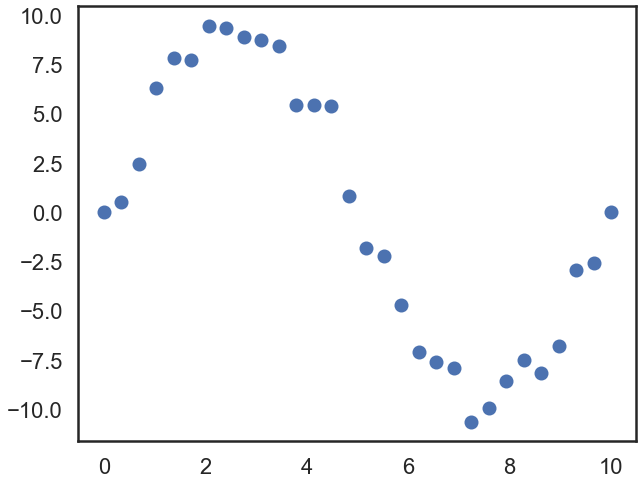

In [61]:
plt.scatter(data[:,0],data[:,1])

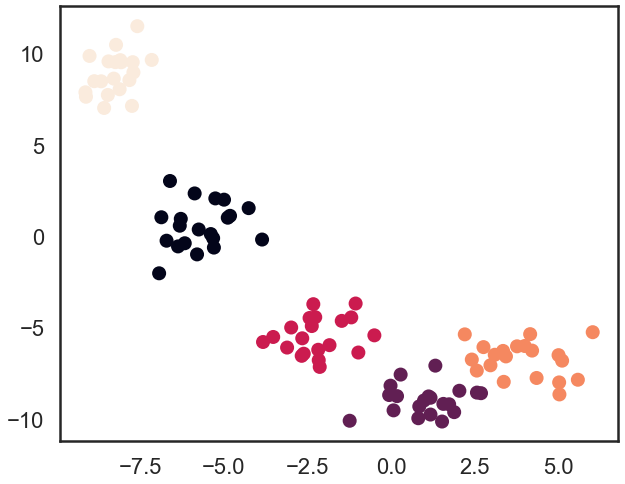

In [9]:
plt.scatter(data1[:,0],data1[:,1],c=y)

In [92]:
X,s,r = fuzzy_simplicial_set(data,n_neighbors = 15,random_state=np.random.RandomState(), metric='euclidean')

In [11]:
X.shape

(30, 30)

In [93]:
G = nx.from_scipy_sparse_matrix(X)

<function matplotlib.pyplot.show(*args, **kw)>

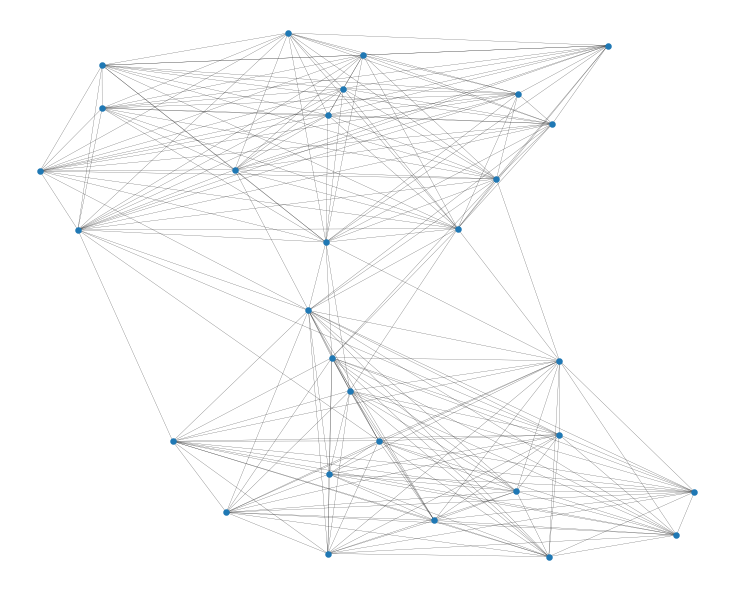

In [94]:
my_pos = nx.spring_layout(G,seed =11)
nx.draw(G, pos= my_pos, with_labels = False, width = 0.2,node_size =20, font_size = 18)
plt.show

In [95]:
knn_indices, knn_dists, _ = nearest_neighbors(
            data, n_neighbors=3, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )

Wed Aug 12 18:50:54 2020 Finding Nearest Neighbors
Wed Aug 12 18:50:54 2020 Building RP forest with 5 trees
Wed Aug 12 18:50:54 2020 NN descent for 5 iterations
	 0  /  5
	 1  /  5
Wed Aug 12 18:50:54 2020 Finished Nearest Neighbor Search


In [96]:
sigmas, rhos = smooth_knn_dist(
        knn_dists, float(15), local_connectivity=float(1),
    )

In [75]:
knn_dists[1]

array([0.        , 0.60149955, 1.9683418 ])

<function matplotlib.pyplot.show(*args, **kw)>

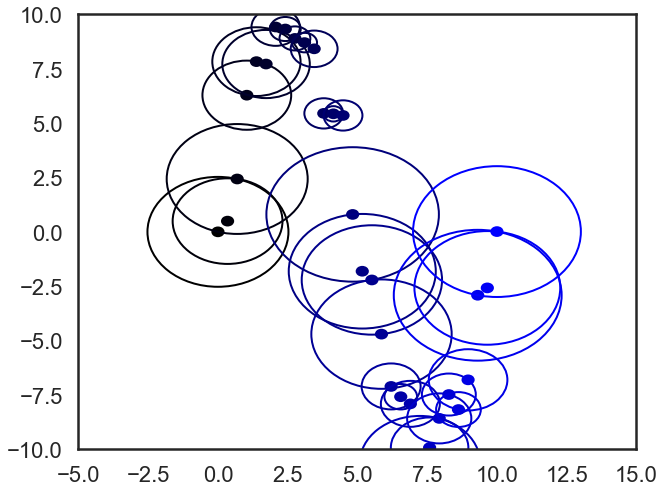

In [106]:
fig,ax = plt.subplots()

for i in range(0,len(sigmas)):
    circle = plt.Circle((data[i,0], data[i,1]), max(knn_dists[i]),fill=False, color =(0, 0, i/29, 1))
    point = plt.Circle((data[i,0], data[i,1]), 0.2 ,fill=True, color =(0, 0, i/29, 1))
    ax.add_artist(circle)
    ax.add_artist(point)
#ax.scatter(data[:,0],data[:,1], c=(0, 0, i/29, 1))
ax.set_xlim((-5,15))
ax.set_ylim((-10, 10))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

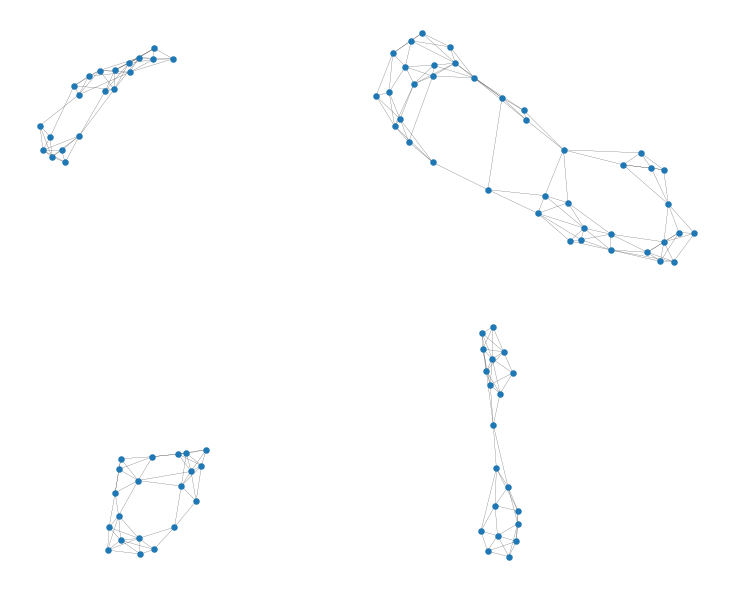

In [79]:
X,s,r = fuzzy_simplicial_set(data1,n_neighbors = 5,random_state=np.random.RandomState(), metric='euclidean')
G = nx.from_scipy_sparse_matrix(X)
my_pos = nx.spring_layout(G,seed =11)
nx.draw(G, pos= my_pos, with_labels = False, c=y, width = 0.2,node_size =20, font_size = 18)
plt.show

In [80]:
knn_indices, knn_dists, _ = nearest_neighbors(
            data1, n_neighbors=10, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas, rhos = smooth_knn_dist(
        knn_dists, float(15), local_connectivity=float(1),
    )

Wed Aug 12 18:40:00 2020 Finding Nearest Neighbors
Wed Aug 12 18:40:00 2020 Building RP forest with 5 trees
Wed Aug 12 18:40:00 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
	 3  /  7
Wed Aug 12 18:40:00 2020 Finished Nearest Neighbor Search


<function matplotlib.pyplot.show(*args, **kw)>

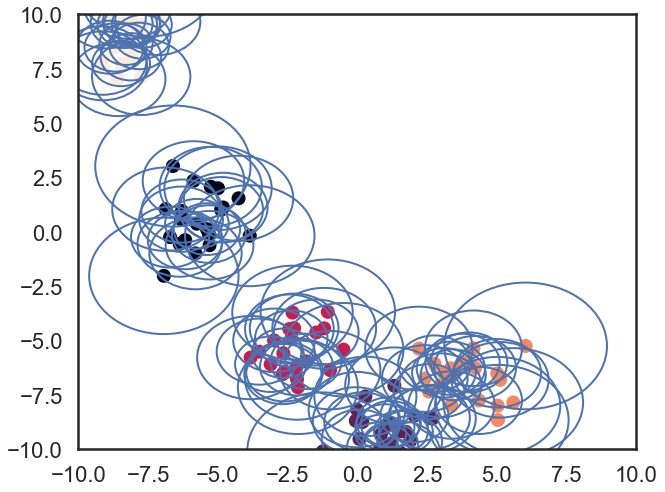

In [84]:
fig,ax = plt.subplots()

for i in range(0,len(sigmas)):
    circle = plt.Circle((data1[i,0], data1[i,1]), max(knn_dists[i]),fill=False, color ='b')
    ax.add_artist(circle)
ax.scatter(data1[:,0],data1[:,1],c=y)
ax.set_xlim((-10,10))
ax.set_ylim((-10, 10))
plt.show